In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
from cmcrameri import cm
%matplotlib inline

In [2]:
EXPERIMENT_NAME = 'P3856'
EXPERIMENT_DIR = '/data2/experiments/{}'.format(EXPERIMENT_NAME)

In [3]:
EXTRACTED_FEATURES_DB_NAME = '{}/extracted-features/extracted-features.sqlite'.format(EXPERIMENT_DIR)
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
extracted_features_df = pd.read_sql_query("select sequence,charge,run_name,target_coords,monoisotopic_mz_centroid,rt_apex,scan_apex from features where classed_as == \'target\'", db_conn)
db_conn.close()


In [4]:
extracted_features_df['target_coords_d'] = extracted_features_df.apply(lambda row: json.loads(row.target_coords), axis=1)
extracted_features_df['target_coords_mz'] = extracted_features_df.apply(lambda row: row.target_coords_d['mono_mz'], axis=1)
extracted_features_df['target_coords_rt'] = extracted_features_df.apply(lambda row: row.target_coords_d['rt_apex'], axis=1)
extracted_features_df['target_coords_scan'] = extracted_features_df.apply(lambda row: row.target_coords_d['scan_apex'], axis=1)


In [5]:
extracted_features_df['delta_mz_ppm'] = (extracted_features_df.monoisotopic_mz_centroid - extracted_features_df.target_coords_mz) / extracted_features_df.target_coords_mz * 1e6
extracted_features_df['delta_rt'] = extracted_features_df.target_coords_rt - extracted_features_df.rt_apex
extracted_features_df['delta_scan'] = extracted_features_df.target_coords_scan - extracted_features_df.scan_apex


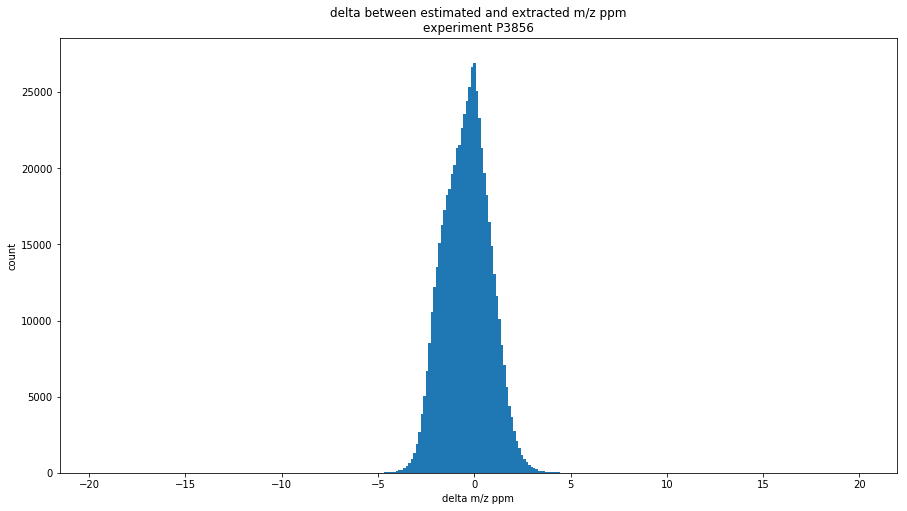

In [6]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_mz_ppm
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta m/z ppm')
plt.ylabel('count')
plt.title('delta between estimated and extracted m/z ppm\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()

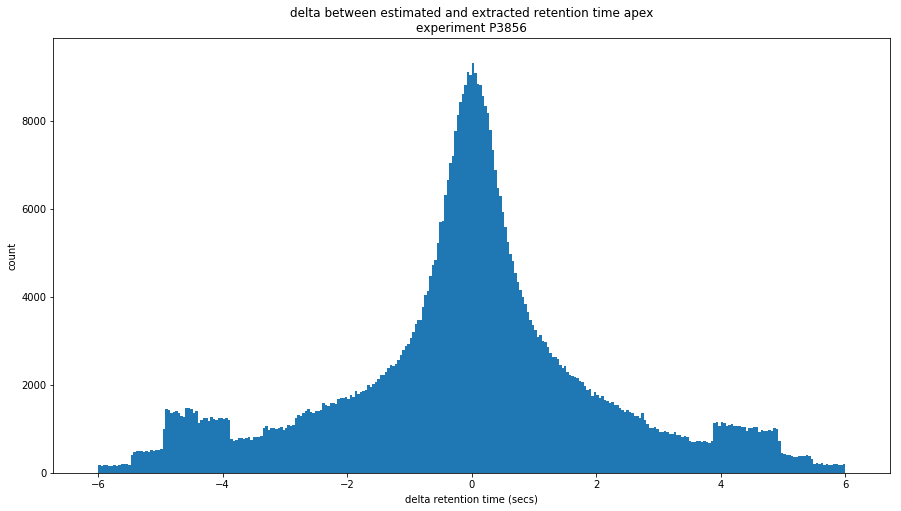

In [7]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_rt
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta retention time (secs)')
plt.ylabel('count')
plt.title('delta between estimated and extracted retention time apex\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()

In [10]:
extracted_features_df[(extracted_features_df.delta_rt<-4)][['sequence','charge','run_name','rt_apex','target_coords_rt','delta_rt']].sample(n=15)

,sequence,charge,run_name,rt_apex,target_coords_rt,delta_rt
145992,GQTYSPAQIGGFVLNK,2,P3856_YHE114_6_Slot1-1_1_5120,1958.734112,1953.744838,-4.989275
315806,TDAPASALWDIMR,2,P3856_YHE010_3_Slot1-1_1_5095,2139.811521,2135.072889,-4.738633
481501,ASYGSGGNSQNQEYSSDDNIDVNK,2,P3856_YHE114_1_Slot1-1_1_5115,1646.442257,1641.132264,-5.309992
229488,NNYNYYQTQNGQEQQSPNQGVAQHSEDSQQK,3,P3856_YHE114_7_Slot1-1_1_5121,1642.676392,1637.462693,-5.213698
278016,WTNQLNSLNQAVVSK,2,P3856_YHE114_5_Slot1-1_1_5119,1841.144637,1836.386915,-4.757722
344167,ELM[15.9949]DEIHQLEDMFTVDSETLR,3,P3856_YHE211_9_Slot1-1_1_5112,2290.867207,2286.683394,-4.183813
300483,AGAGSATLSMAYAGAR,2,P3856_YHE010_3_Slot1-1_1_5095,1731.207135,1726.669074,-4.538061
526546,GGYQFGPFNPK,2,P3856_YHE114_9_Slot1-1_1_5123,2029.082609,2024.578218,-4.504392
253284,SPIILQTSNGGAAYFAGK,2,P3856_YHE211_1_Slot1-1_1_5104,1901.852464,1897.018527,-4.833937
328993,LAQANGWGVMVSHR,2,P3856_YHE211_5_Slot1-1_1_5108,1725.299413,1720.810938,-4.488475


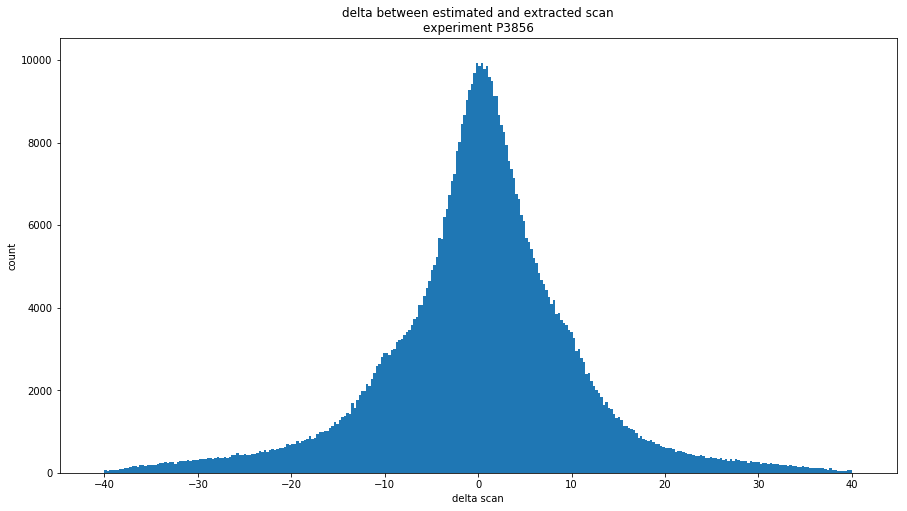

In [9]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = extracted_features_df.delta_scan
y, x, _ = ax1.hist(values, bins=bins)

plt.xlabel('delta scan')
plt.ylabel('count')
plt.title('delta between estimated and extracted scan\nexperiment {}'.format(EXPERIMENT_NAME))

plt.show()